In [9]:
%config IPCompleter.greedy=True
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,9]

In [10]:
def barcode_detection(org):
    scale = 400.0 / org.shape[0]
    org = cv2.resize(org, None, fx=scale, fy=scale)
    img = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(img, 50, 50)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 17))
    opening = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
    plt.imshow(opening, cmap = 'gray')
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    dilate = cv2.morphologyEx(opening, cv2.MORPH_DILATE, kernel)
    contours, hierarchy = cv2.findContours(dilate,  
    cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    bound_rect = [cv2.minAreaRect(c) for c in contours]
    filtered = []
    for b in bound_rect:
        ratito = max(b[1]) / min(b[1]) 
        area = b[1][0] * b[1][1]
        if ratito > 1.5 and ratito < 3 and area > 2000:
            filtered.append(b)
    box = [cv2.boxPoints(f) for f in filtered]
    box = np.int0(box)
    cv2.drawContours(org, box, -1, (0, 255, 0), 2)
    return org

True

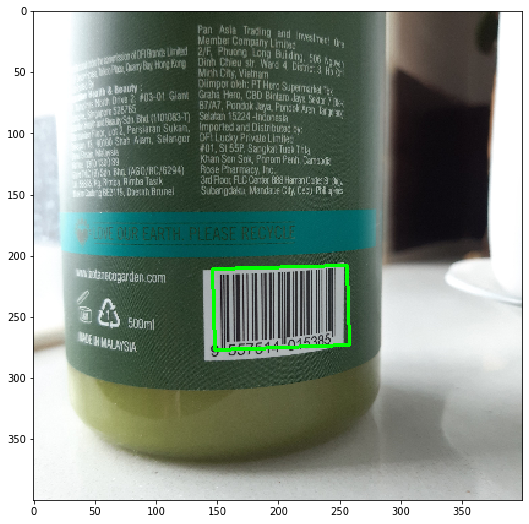

In [11]:
org = cv2.imread("01.jpg", 1)
org = barcode_detection(org)
plt.imshow(org[:, :, ::-1])
cv2.imwrite("out1.jpg", org)

True

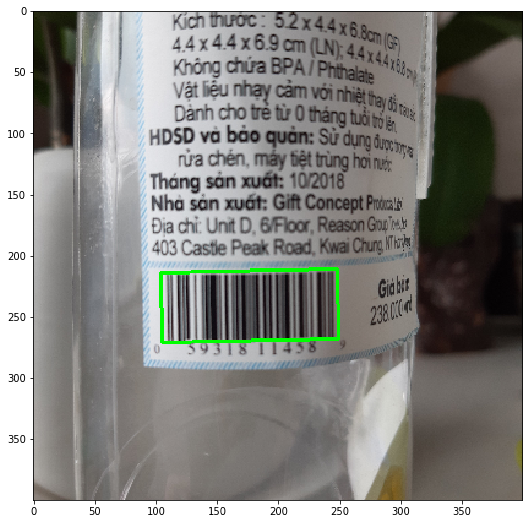

In [12]:
org = cv2.imread("02.jpg", 1)
org = barcode_detection(org)
plt.imshow(org[:, :, ::-1])
cv2.imwrite("out2.jpg", org)

True

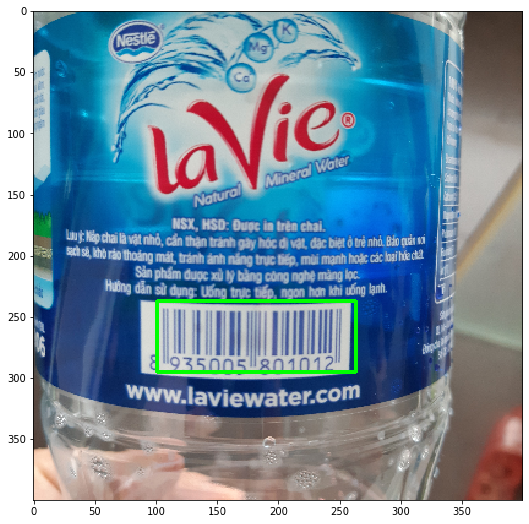

In [13]:
org = cv2.imread("05.jpg", 1)
org = barcode_detection(org)
plt.imshow(org[:, :, ::-1])
cv2.imwrite("out5.jpg", org)